# Controlling Plot Aesthetics

- order: 5

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2023.02.14


In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                 'Control 2' : c2,     'Test 2' : t2,
                 'Control 3' : c3,     'Test 3' : t3,
                 'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                 'Gender'    : gender, 'ID'  : id_col
                })

In [ ]:
 two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), resamples=5000)

## Changing y-axes labels

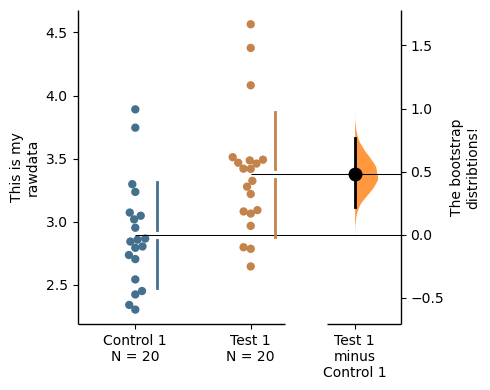

In [ ]:
two_groups_unpaired.mean_diff.plot(swarm_label="This is my\nrawdata",
                                       contrast_label="The bootstrap\ndistribtions!");

## Changing the graph colours

### Colour categories from another variable
Use the parameter `color_col` to specify which column in the dataframe will be used to create the different colours for your graph.

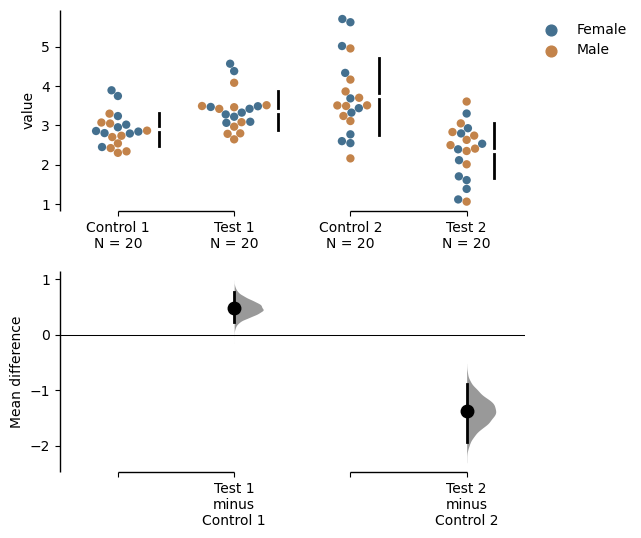

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1",),
                                         ("Control 2", "Test 2")
                                       ))
multi_2group.mean_diff.plot(color_col="Gender");

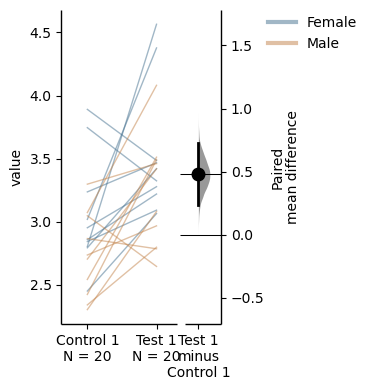

In [ ]:
two_groups_paired_baseline = dabest.load(df, idx=("Control 1", "Test 1"),
                                  paired="baseline", id_col="ID")
two_groups_paired_baseline.mean_diff.plot(color_col="Gender");

### Adding a custom palette
The colour palette for the graph can be changed using the parameter `custom_palette`. All values from matplotlib or seaborn color palettes are accepted.

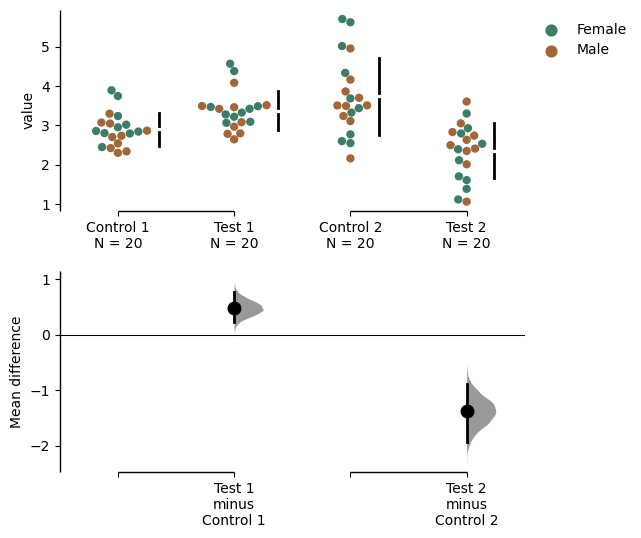

In [ ]:
multi_2group.mean_diff.plot(color_col="Gender", custom_palette="Dark2");

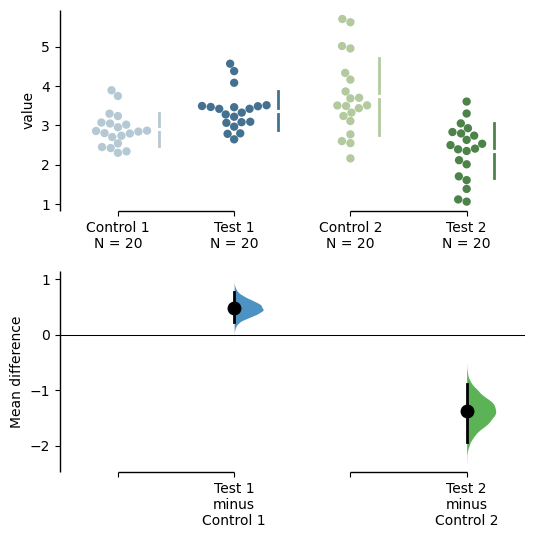

In [ ]:
multi_2group.mean_diff.plot(custom_palette="Paired");

Additionally, a customized color palette can be defined by creating a dictionary where the keys are group names, and the values are valid matplotlib colours.

There are [many ways](https://matplotlib.org/users/colors.html) to specify matplotlib colours. Find one example below using accepted colour names, hex strings (commonly used on the web), and RGB tuples.

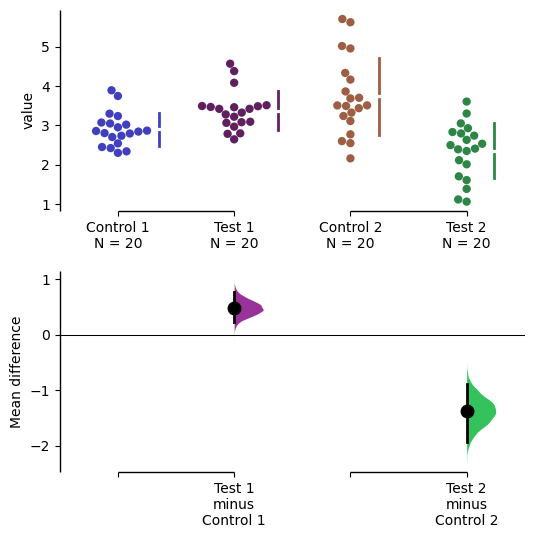

In [ ]:
my_color_palette = {"Control 1" : "blue",
                        "Test 1"    : "purple",
                        "Control 2" : "#cb4b16",     # This is a hex string.
                        "Test 2"    : (0., 0.7, 0.2) # This is a RGB tuple.
                       }

multi_2group.mean_diff.plot(custom_palette=my_color_palette);

## Changing colour saturation

By default, ``dabest.plot()`` [desaturates](https://en.wikipedia.org/wiki/Colorfulness#Saturation)
the colour of the dots in the swarmplot by 50%. This draws attention to the effect size bootstrap curves.

You can alter the default values with the parameters ``swarm_desat`` and ``halfviolin_desat``.


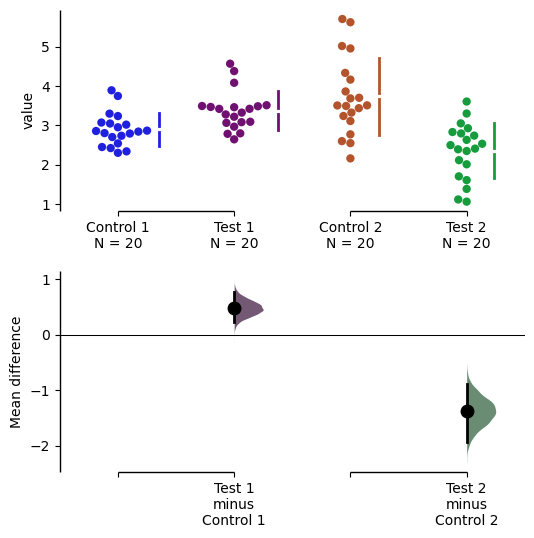

In [ ]:
multi_2group.mean_diff.plot(custom_palette=my_color_palette,
                                swarm_desat=0.75,
                                halfviolin_desat=0.25);

## Changing size
It is possible change the size of the dots used in the rawdata swarmplot, as well as those to indicate the effect sizes, by using the parameters `raw_marker_size` and `es_marker_size` respectively.


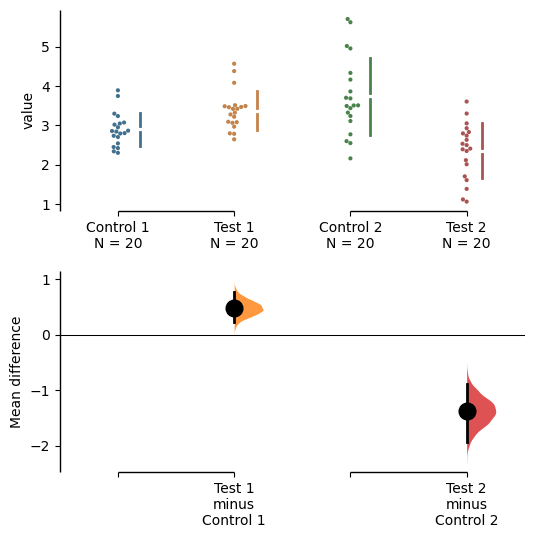

In [ ]:
multi_2group.mean_diff.plot(raw_marker_size=3,
                                es_marker_size=12);

## Changing axes

To change the y-limits for the rawdata axes, and the contrast axes, use the parameters `swarm_ylim` and `contrast_ylim`.

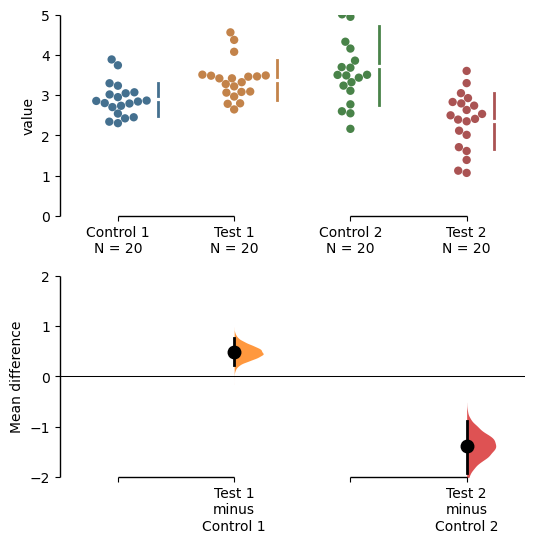

In [ ]:
multi_2group.mean_diff.plot(swarm_ylim=(0, 5),
                                contrast_ylim=(-2, 2));

If the effect size is qualitatively inverted (ie. a smaller value is a
better outcome), you can simply invert the tuple passed to
``contrast_ylim``.

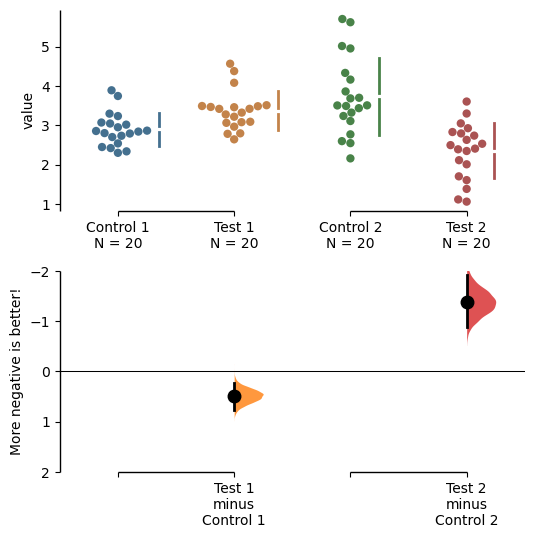

In [ ]:
multi_2group.mean_diff.plot(contrast_ylim=(2, -2),
                                contrast_label="More negative is better!");

The contrast axes share the same y-limits as those of the delta-delta plot. Thus, the y axis of the delta-delta plot changes as well.

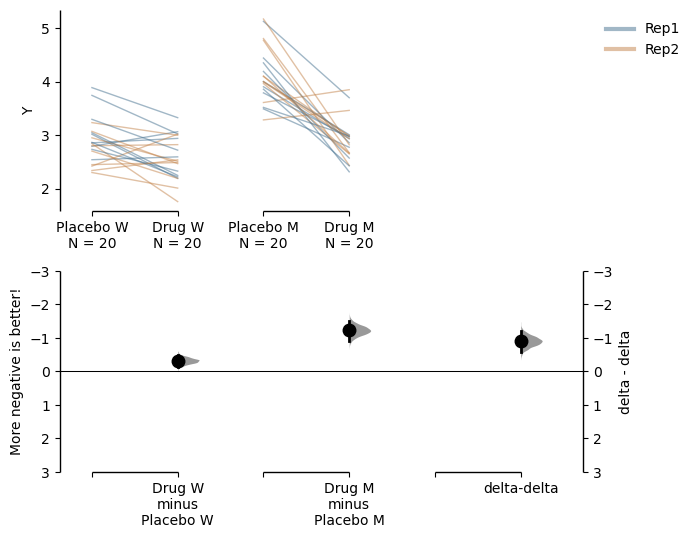

In [ ]:
np.random.seed(9999) # Fix the seed so the results are replicable.

# Create samples
N = 20
y = norm.rvs(loc=3, scale=0.4, size=N*4)
y[N:2*N] = y[N:2*N]+1
y[2*N:3*N] = y[2*N:3*N]-0.5

# Add a `Treatment` column
t1 = np.repeat('Placebo', N*2).tolist()
t2 = np.repeat('Drug', N*2).tolist()
treatment = t1 + t2 

# Add a `Rep` column as the first variable for the 2 replicates of experiments done
rep = []
for i in range(N*2):
    rep.append('Rep1')
    rep.append('Rep2')

# Add a `Genotype` column as the second variable
wt = np.repeat('W', N).tolist()
mt = np.repeat('M', N).tolist()
wt2 = np.repeat('W', N).tolist()
mt2 = np.repeat('M', N).tolist()


genotype = wt + mt + wt2 + mt2

# Add an `id` column for paired data plotting.
id = list(range(0, N*2))
id_col = id + id 


# Combine all columns into a DataFrame.
df_delta2 = pd.DataFrame({'ID'        : id_col,
                  'Rep'      : rep,
                   'Genotype'  : genotype, 
                   'Treatment': treatment,
                   'Y'         : y
                })

paired_delta2 = dabest.load(data = df_delta2, 
                                paired = "baseline", id_col="ID",
                                x = ["Treatment", "Rep"], y = "Y", 
                                delta2 = True, experiment = "Genotype")
paired_delta2.mean_diff.plot(contrast_ylim=(3, -3),
                                 contrast_label="More negative is better!");

You can also change the `*y-limits* and *y-label* for the delta-delta plot.

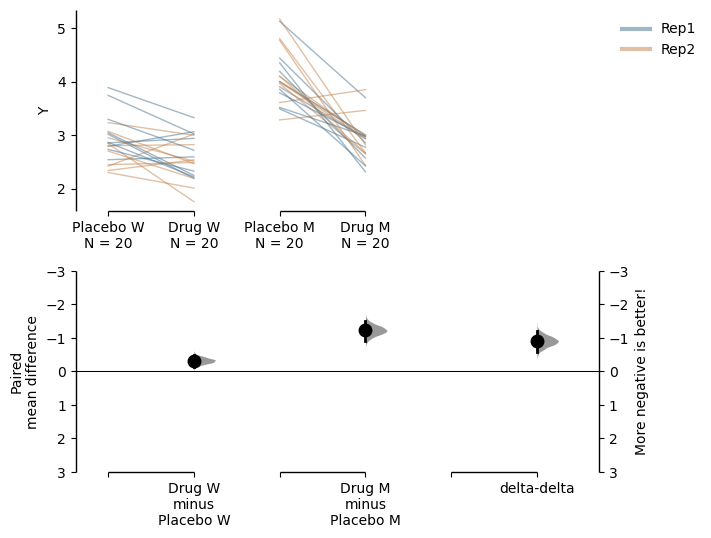

In [ ]:
paired_delta2.mean_diff.plot(delta2_ylim=(3, -3),
                                 delta2_label="More negative is better!");

### Axes ticks
You can add minor ticks and also change the tick frequency by accessing
the axes directly.

Each estimation plot produced by ``dabest`` has two axes. The first one
contains the rawdata swarmplot while the second one contains the bootstrap
effect size differences.


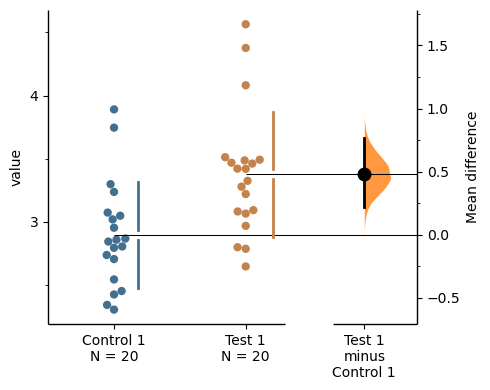

In [ ]:
import matplotlib.ticker as Ticker

f = two_groups_unpaired.mean_diff.plot()

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.yaxis.set_major_locator(Ticker.MultipleLocator(1))
rawswarm_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.5))

contrast_axes.yaxis.set_major_locator(Ticker.MultipleLocator(0.5))
contrast_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.25))

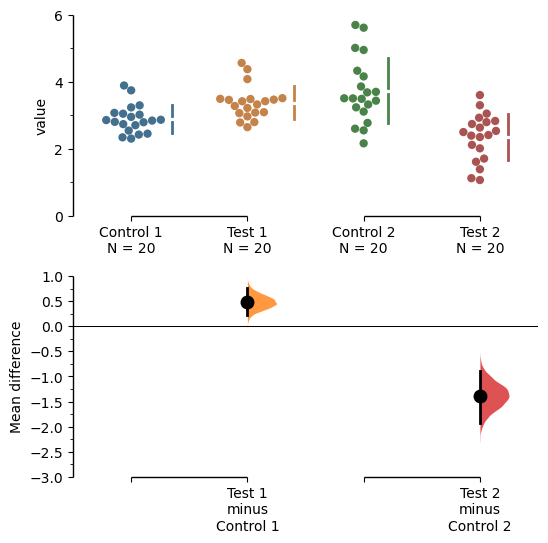

In [ ]:
f = multi_2group.mean_diff.plot(swarm_ylim=(0,6),
                                   contrast_ylim=(-3, 1))

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.yaxis.set_major_locator(Ticker.MultipleLocator(2))
rawswarm_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(1))

contrast_axes.yaxis.set_major_locator(Ticker.MultipleLocator(0.5))
contrast_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.25))

## Hiding options 
For mini-meta plots, it is possible to hide the weighted average plot by setting the parameter ``show_mini_meta=False`` in the ``plot()`` function.

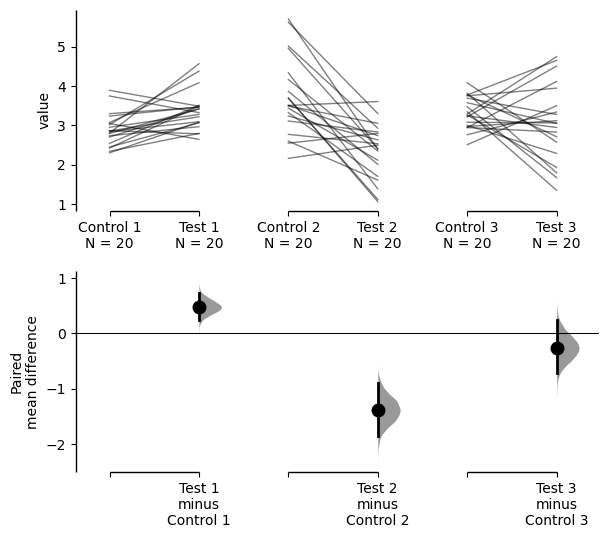

In [ ]:
np.random.seed(9999) # Fix the seed so the results are replicable.
# pop_size = 10000 # Size of each population.
Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                   'Control 2' : c2,     'Test 2' : t2,
                   'Control 3' : c3,     'Test 3' : t3,
                   'Gender'    : gender, 'ID'  : id_col
                  })
mini_meta_paired = dabest.load(df, idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), mini_meta=True, id_col="ID", paired="baseline")
mini_meta_paired.mean_diff.plot(show_mini_meta=False);

Similarly, you can also hide the delta-delta plot by setting 
``show_delta2=False`` in the ``plot()`` function.

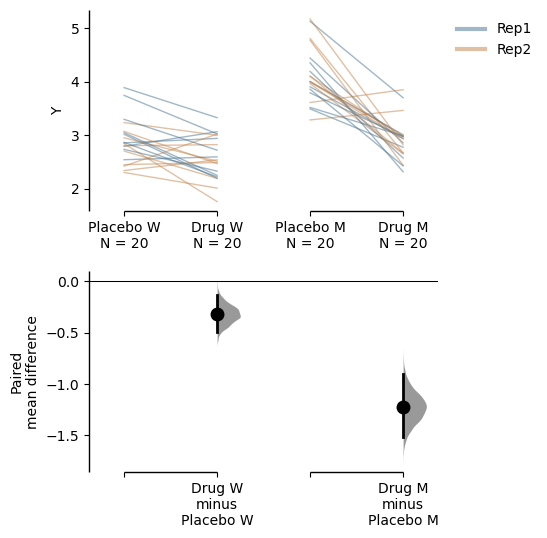

In [ ]:
paired_delta2.mean_diff.plot(show_delta2=False);

## Creating estimation plots in existing axes

*Implemented in v0.2.6 by Adam Nekimken*.

``dabest.plot`` has an ``ax`` parameter that accepts Matplotlib
``Axes``. The entire estimation plot will be created in the specified
``Axes``.


In [ ]:
two_groups_paired_baseline = dabest.load(df, idx=("Control 1", "Test 1"),
                                  paired="baseline", id_col="ID")
multi_2group_paired = dabest.load(df,
                            idx=(("Control 1", "Test 1"),
                                 ("Control 2", "Test 2")),
                            paired="baseline", id_col="ID")

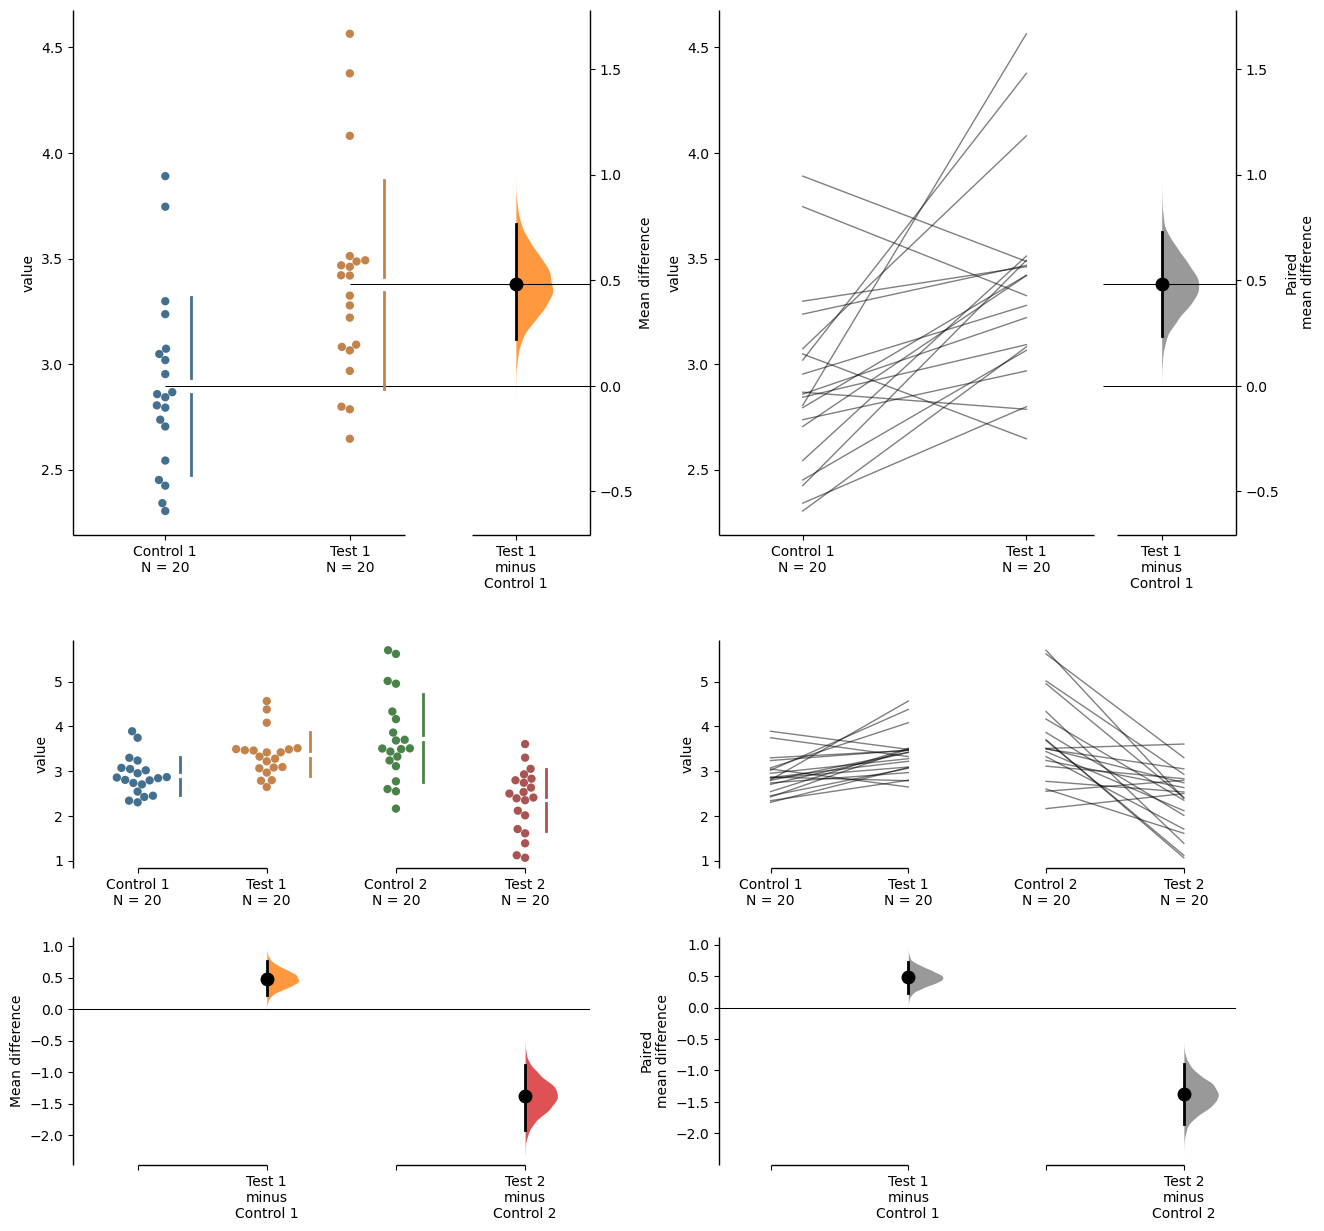

In [ ]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(nrows=2, ncols=2,
                      figsize=(15, 15),
                      gridspec_kw={'wspace': 0.25} # ensure proper width-wise spacing.
                     )

two_groups_unpaired.mean_diff.plot(ax=axx.flat[0]);

two_groups_paired_baseline.mean_diff.plot(ax=axx.flat[1]);

multi_2group.mean_diff.plot(ax=axx.flat[2]);

multi_2group_paired.mean_diff.plot(ax=axx.flat[3]);

In this case, to access the individual rawdata axes, use
``name_of_axes`` to manipulate the rawdata swarmplot axes, and
``name_of_axes.contrast_axes`` to gain access to the effect size axes.

In [ ]:
topleft_axes = axx.flat[0]
topleft_axes.set_ylabel("New y-axis label for rawdata")
topleft_axes.contrast_axes.set_ylabel("New y-axis label for effect size")

Text(638.7222222222223, 0.5, 'New y-axis label for effect size')